In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

In [2]:
#Fetching Data
invistico_data = pd.read_csv('Invistico_Airline.csv')

invistico_data.head()

satisfaction  Gender   Customer Type  Age   Type of Travel     Class  \
0    satisfied  Female  Loyal Customer   65  Personal Travel       Eco   
1    satisfied    Male  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Female  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Female  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Female  Loyal Customer   70  Personal Travel       Eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   

   Food and drink  ...  Online support  Ease of Online booking  \
0               0  ...               2                       3   
1               0  ...               2                       3   
2               0  ...               2                       2   
3               0  ...               3                       1   
4               0  ...               4                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 3                 0                 3                5   
1                 4                 4                 4                2   
2                 3                 3                 4                4   
3                 1                 0                 1                4   
4                 2                 0                 2                4   

   Cleanliness  Online boarding  Departure Delay in Minutes  \
0            3                2                           0   
1            3                2                         310   
2            4                2                           0   
3            1                3                           0   
4            2                5                           0   

   Arrival Delay in Minutes  
0                      0.00  
1                    305.00  
2                      0.00  
3                      0.00  
4                      0.00  

[5 rows x 23 columns]

In [3]:
#checking NAN values
invistico_data.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [4]:
#Dropping NaN values
invistico_data = invistico_data.dropna()
print(invistico_data.isnull().sum())

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64


In [5]:
#checking data types 
result = invistico_data.dtypes
print(result)

satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

In [6]:
#printing all rows to know the count
invistico_data.shape[0]

129487

In [7]:
invistico_data.describe()

Age  Flight Distance  Seat comfort  \
count 129,487.00       129,487.00    129,487.00   
mean       39.43         1,981.01          2.84   
std        15.12         1,026.88          1.39   
min         7.00            50.00          0.00   
25%        27.00         1,359.00          2.00   
50%        40.00         1,924.00          3.00   
75%        51.00         2,543.00          4.00   
max        85.00         6,951.00          5.00   

       Departure/Arrival time convenient  Food and drink  Gate location  \
count                         129,487.00      129,487.00     129,487.00   
mean                                2.99            2.85           2.99   
std                                 1.53            1.44           1.31   
min                                 0.00            0.00           0.00   
25%                                 2.00            2.00           2.00   
50%                                 3.00            3.00           3.00   
75%                                 4.00            4.00           4.00   
max                                 5.00            5.00           5.00   

       Inflight wifi service  Inflight entertainment  Online support  \
count             129,487.00              129,487.00      129,487.00   
mean                    3.25                    3.38            3.52   
std                     1.32                    1.35            1.31   
min                     0.00                    0.00            0.00   
25%                     2.00                    2.00            3.00   
50%                     3.00                    4.00            4.00   
75%                     4.00                    4.00            5.00   
max                     5.00                    5.00            5.00   

       Ease of Online booking  On-board service  Leg room service  \
count              129,487.00        129,487.00        129,487.00   
mean                     3.47              3.47              3.49   
std                      1.31              1.27              1.29   
min                      0.00              0.00              0.00   
25%                      2.00              3.00              2.00   
50%                      4.00              4.00              4.00   
75%                      5.00              4.00              5.00   
max                      5.00              5.00              5.00   

       Baggage handling  Checkin service  Cleanliness  Online boarding  \
count        129,487.00       129,487.00   129,487.00       129,487.00   
mean               3.70             3.34         3.71             3.35   
std                1.16             1.26         1.15             1.30   
min                1.00             0.00         0.00             0.00   
25%                3.00             3.00         3.00             2.00   
50%                4.00             3.00         4.00             4.00   
75%                5.00             4.00         5.00             4.00   
max                5.00             5.00         5.00             5.00   

       Departure Delay in Minutes  Arrival Delay in Minutes  
count                  129,487.00                129,487.00  
mean                        14.64                     15.09  
std                         37.93                     38.47  
min                          0.00                      0.00  
25%                          0.00                      0.00  
50%                          0.00                      0.00  
75%                         12.00                     13.00  
max                      1,592.00                  1,584.00

In [8]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from plotly import tools
import plotly.graph_objects as go
import seaborn as sns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')


<AxesSubplot:>

satisfaction


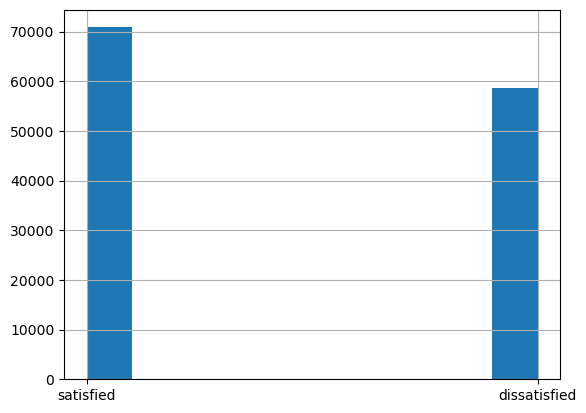

<AxesSubplot:>

Gender


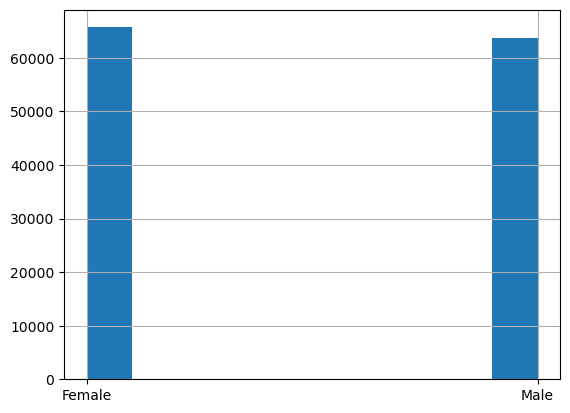

<AxesSubplot:>

Customer Type


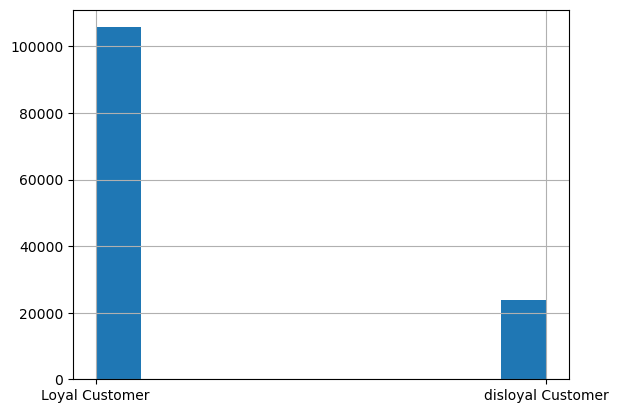

<AxesSubplot:>

Age


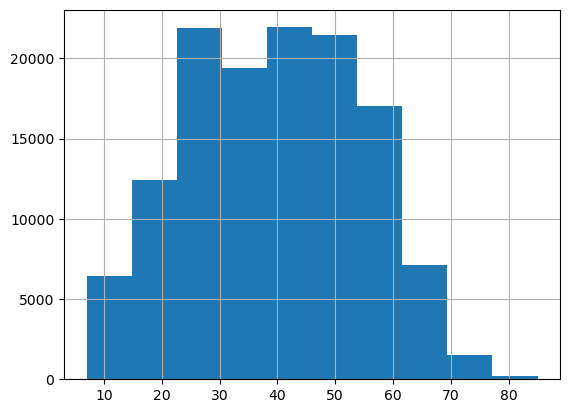

<AxesSubplot:>

Type of Travel


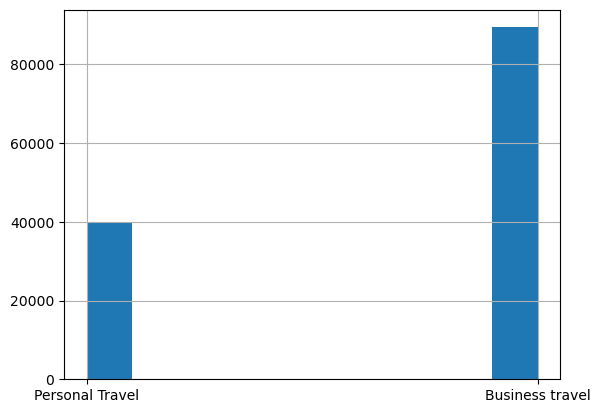

<AxesSubplot:>

Class


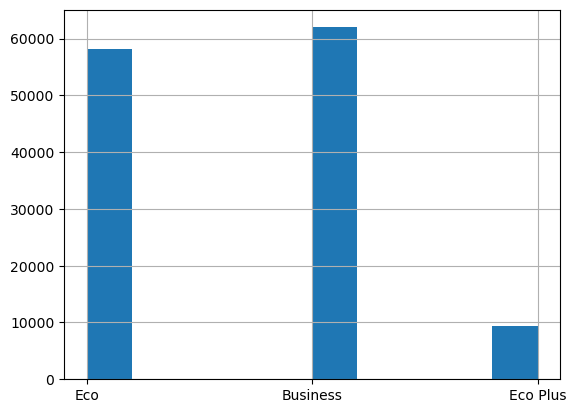

<AxesSubplot:>

Flight Distance


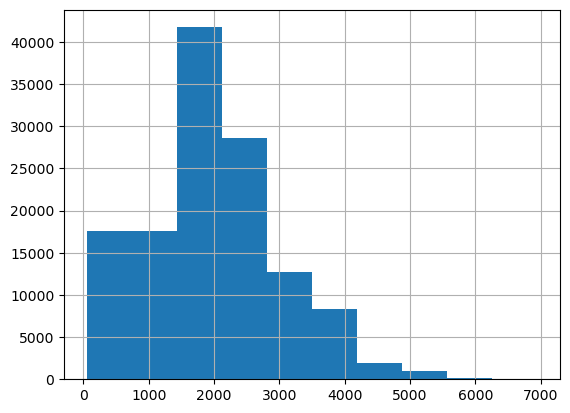

<AxesSubplot:>

Seat comfort


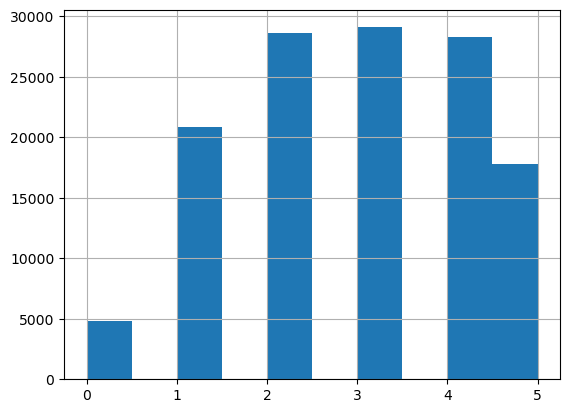

<AxesSubplot:>

Departure/Arrival time convenient


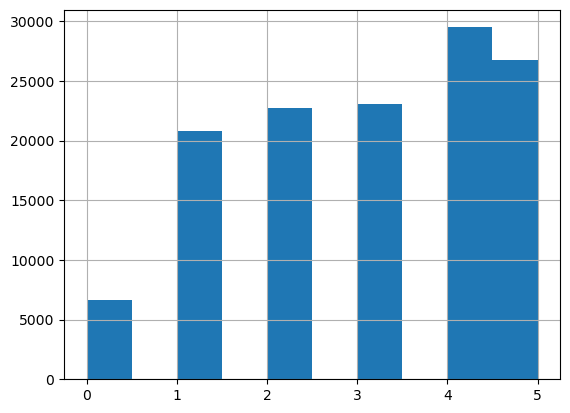

<AxesSubplot:>

Food and drink


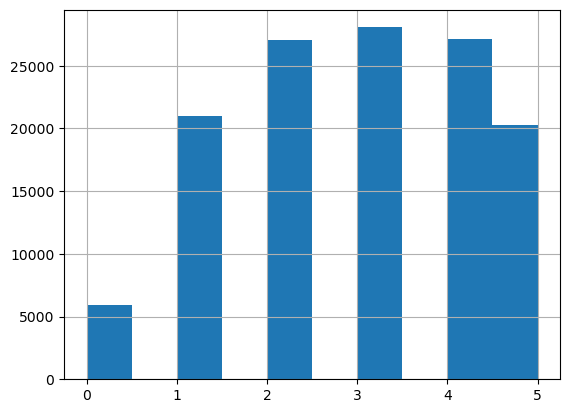

<AxesSubplot:>

Gate location


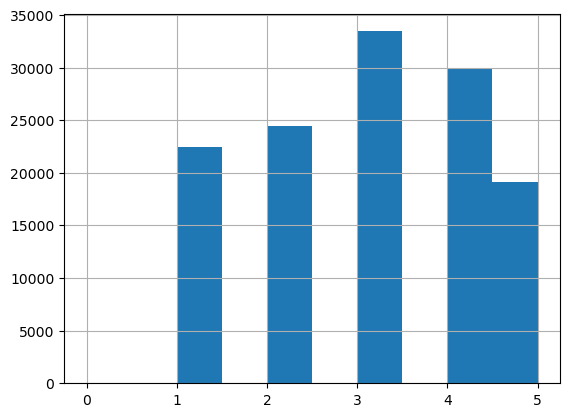

<AxesSubplot:>

Inflight wifi service


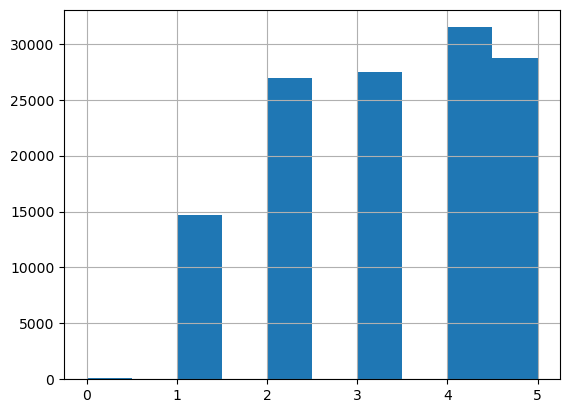

<AxesSubplot:>

Inflight entertainment


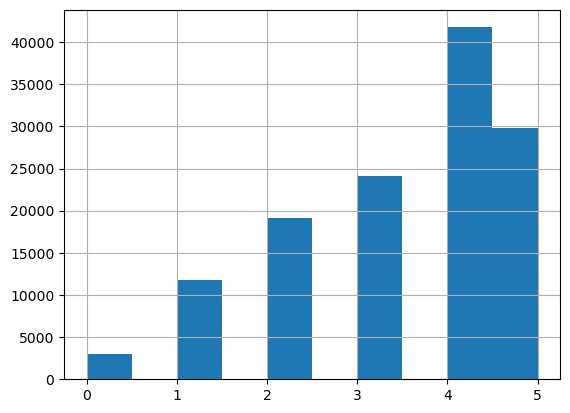

<AxesSubplot:>

Online support


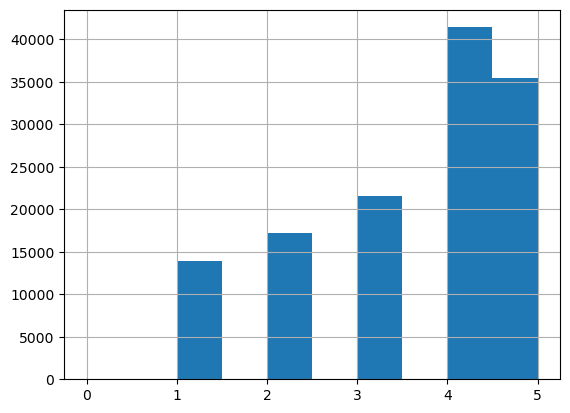

<AxesSubplot:>

Ease of Online booking


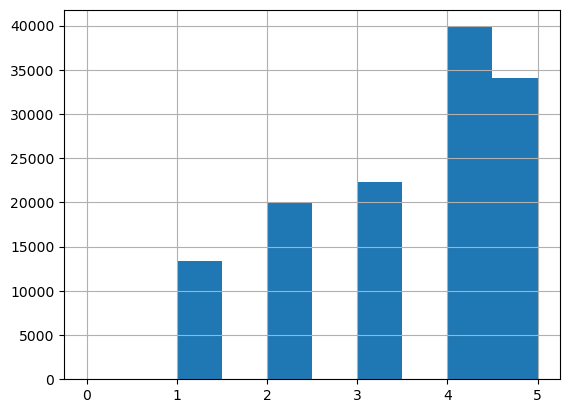

<AxesSubplot:>

On-board service


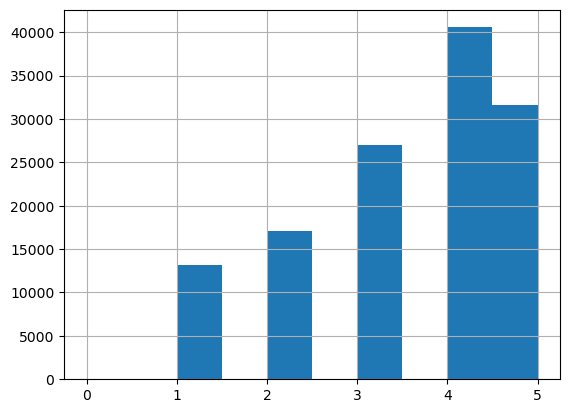

<AxesSubplot:>

Leg room service


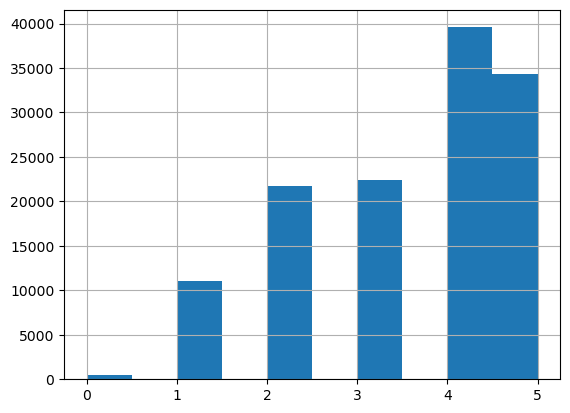

<AxesSubplot:>

Baggage handling


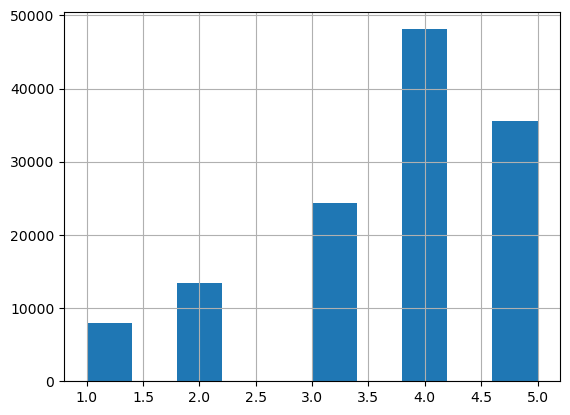

<AxesSubplot:>

Checkin service


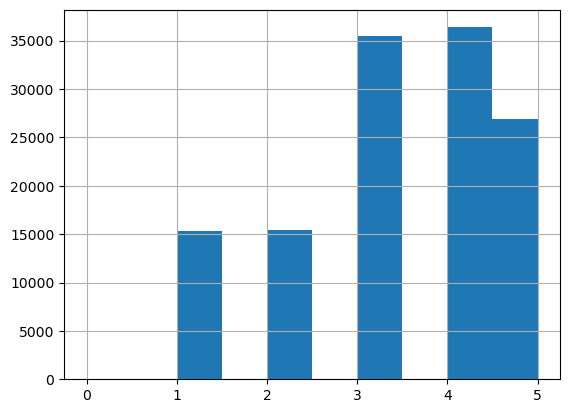

<AxesSubplot:>

Cleanliness


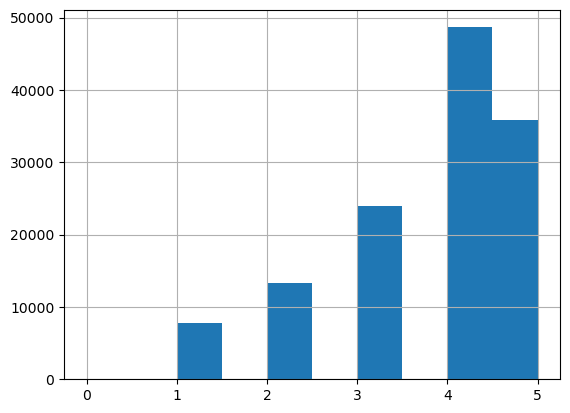

<AxesSubplot:>

Online boarding


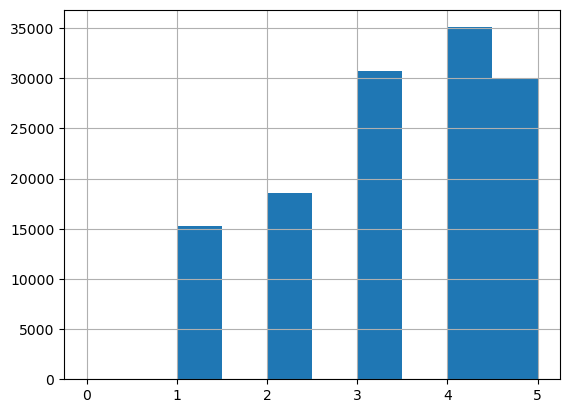

<AxesSubplot:>

Departure Delay in Minutes


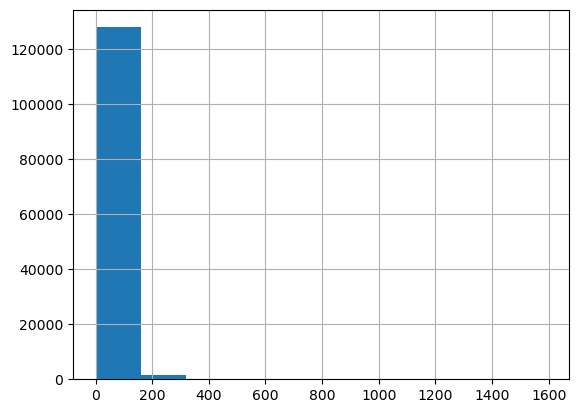

<AxesSubplot:>

Arrival Delay in Minutes


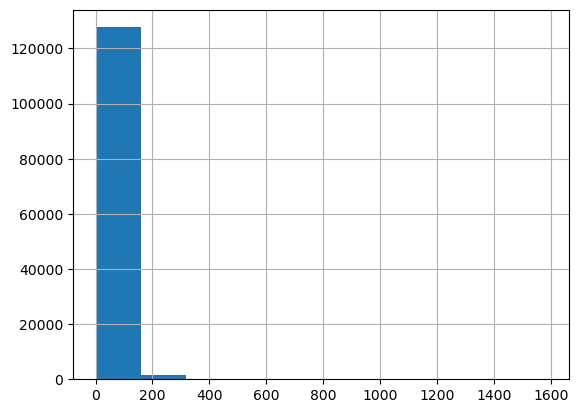

In [9]:
cols = invistico_data.columns
print(cols)
for col in cols: 
    invistico_data[col].hist()
    print(col)
    plt.show()

In [10]:
# define function to import viz libraries
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from plotly import tools
import plotly.graph_objects as go
import seaborn as sns

In [11]:
# Function to visualize by features
def visualize_by_features(list_of_features, y_col):
    for x_col in list_of_features:
        plot_data = []
        df = invistico_data[[x_col, y_col]].sort_values(by=x_col)
        plot_data.append(go.Scatter(x= df[x_col], y= df[y_col], 
                         name = 'feature = {}'.format(x_col), mode = 'markers' ))

        layout = go.Layout(xaxis = dict(title=x_col), yaxis = dict(title= y_col), 
                           title = 'Data for {}'.format(y_col))
        fig = go.Figure(data= plot_data, layout=layout)
        plotly.offline.iplot(fig)

In [12]:
invistico_data.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [13]:
df_1 = invistico_data[['Departure Delay in Minutes', 'Flight Distance', 'Arrival Delay in Minutes']]


In [14]:
correlation = df_1.corr()

<AxesSubplot:>

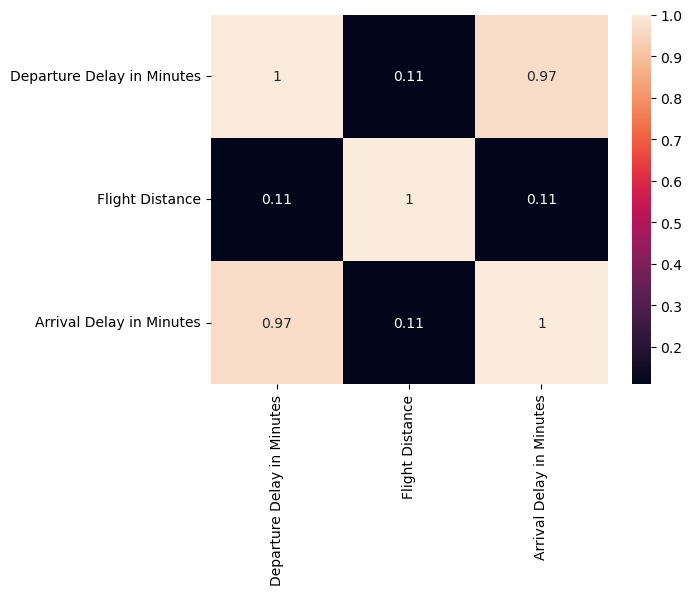

In [15]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

<AxesSubplot:>

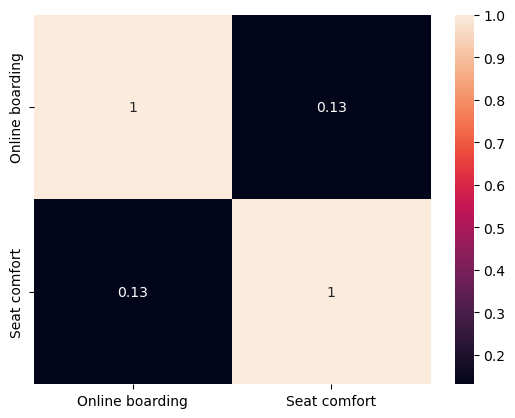

In [16]:
df_2 = invistico_data[['Online boarding','Seat comfort']]
correlation = df_2.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

<AxesSubplot:>

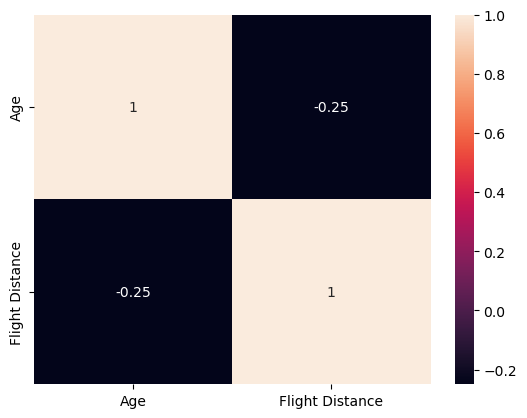

In [17]:
df_3 = invistico_data[['Age', 'Flight Distance']]
correlation = df_3.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

<AxesSubplot:>

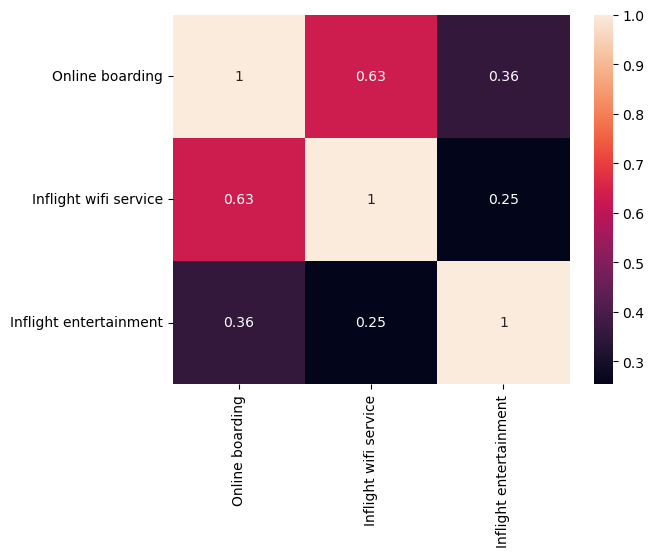

In [18]:
df_4 = invistico_data[['Online boarding', 'Inflight wifi service','Inflight entertainment']]
correlation = df_4.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

In [19]:
invistico_data = invistico_data[(invistico_data['Departure Delay in Minutes'] > 0) & (invistico_data['Arrival Delay in Minutes'] > 0)]
n = invistico_data.shape[0]
print("rows:", n)

rows: 42876


In [20]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from plotly import tools
import plotly.graph_objects as go
import seaborn as sns

In [21]:
y_col = 'Arrival Delay in Minutes'
x_col = 'Age'

df = invistico_data[[x_col, y_col]].sort_values(by=x_col)
plot_data = []
plot_data.append(go.Scatter(x= df[x_col], y= df[y_col] , mode = 'markers'))

layout = go.Layout(xaxis = dict(title=x_col), yaxis = dict(title= y_col), 
                       title = 'Plot of {} versus {}'.format(y_col, x_col))
fig = go.Figure(data= plot_data, layout=layout)
plotly.offline.iplot(fig)

In [22]:
y_col = 'Arrival Delay in Minutes'
x_col = 'Departure Delay in Minutes'

df = invistico_data[[x_col, y_col]].sort_values(by=x_col)
plot_data = []
plot_data.append(go.Scatter(x= df[x_col], y= df[y_col] , mode = 'markers'))

layout = go.Layout(xaxis = dict(title=x_col), yaxis = dict(title= y_col), 
                       title = 'Plot of {} versus {}'.format(y_col, x_col))
fig = go.Figure(data= plot_data, layout=layout)
plotly.offline.iplot(fig)

In [23]:
y_col = 'Flight Distance'
x_col = 'Arrival Delay in Minutes'
df = invistico_data[[x_col, y_col]].sort_values(by=x_col)
plot_data = []
plot_data.append(go.Scatter(x= df[x_col], y= df[y_col] , mode = 'markers'))

layout = go.Layout(xaxis = dict(title=x_col), yaxis = dict(title= y_col), 
                       title = 'Plot of {} versus {}'.format(y_col, x_col))
fig = go.Figure(data= plot_data, layout=layout)
plotly.offline.iplot(fig)